
Imports e definição do dataset.

In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

Carregamento dos datasets

In [7]:
# Carregar os conjuntos de dados CIFAR-10, CIFAR-100, MNIST, FASHION MNIST
cifar10  = keras.datasets.cifar10

#Carrega duas tuplas, representando os dados de treinamento e de teste.
#Cada tupla tem as imagens e os respectivos rótulos
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalização dos dados
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


num_classes = 10

O código abaixo mostra as 10 primeiras imagens de treino e teste do cifar-10

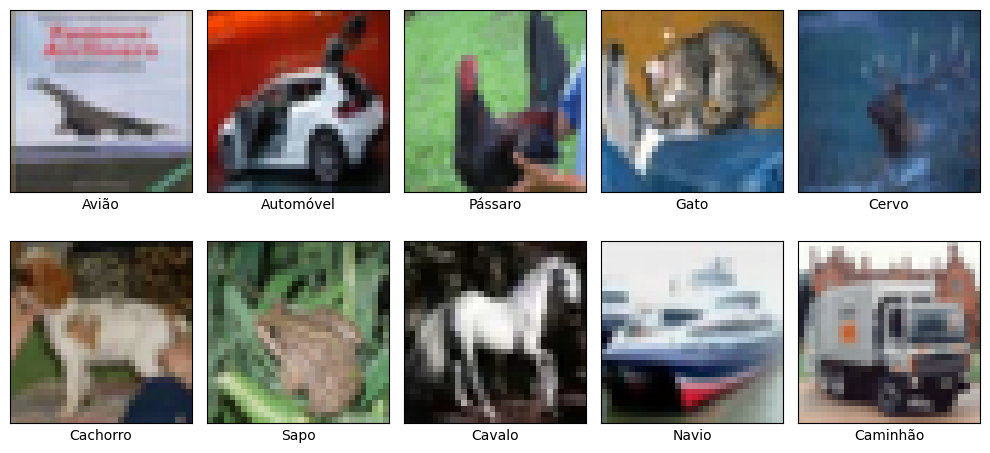

In [8]:
# Defina as classes do CIFAR-10
class_names = ['Avião', 'Automóvel', 'Pássaro', 'Gato', 'Cervo',
               'Cachorro', 'Sapo', 'Cavalo', 'Navio', 'Caminhão']

# Crie um dicionário para mapear as classes para as imagens correspondentes
class_to_image = {}
for i in range(10):
    index = (test_labels == i).nonzero()[0][0]  # Encontre o primeiro índice da classe
    class_to_image[i] = test_images[index]

# Mostre uma imagem de cada classe
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])  # Remova os rótulos do eixo x
    plt.yticks([])  # Remova os rótulos do eixo y
    plt.imshow(class_to_image[i])
    plt.xlabel(class_names[i])

plt.tight_layout()
plt.show()

Abaixo, convertemos os rótulos escalares (números de 0 a 9) para one-hot encoding.

Não é necessário realizar este passo, caso seja utilizada a função de custo esparse_categorical_cross_entropy

In [9]:
# Converter para codificação one-hot dos labels
# train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=num_classes)
# test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=num_classes)

# Não é necessário se utilizar como função de custo esparse_categorical_cross_entropy

Função que retorna uma rede neural para o cifar-10

In [10]:
# Crie o modelo de rede neural convolucional simples
def get_cifar10_network():
    model = keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='elu', input_shape=(32, 32, 3)), 
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (4, 4), activation='gelu'), 
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (4, 4), activation='gelu'), 
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='elu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # 10 classes de saída
    ])

    # Compile o modelo
    model.compile(optimizer=keras.optimizers.Adam(weight_decay=0.05),
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    model.summary()

    return model

Trecho para treinar e avaliar a rede neural.
O treino é realizado com os dados de treino e a avaliação do modelo é realizada nos dados de teste.

In [140]:
# Treine o modelo
model = get_cifar10_network()
model.fit(train_images, train_labels, epochs=10)

# Avalie o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_187 (Conv2D)                  │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_110 (MaxPooling2D)     │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_188 (Conv2D)                  │ (None, 12, 12, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_111 (MaxPooling2D)     │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_189 (Conv2D)                  │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_56 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_113 (Dense)                    │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,906 (534.79 KB)

 Trainable params: 136,906 (534.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4232 - loss: 1.5922
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6369 - loss: 1.0245
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6977 - loss: 0.8509
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7466 - loss: 0.7249
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7778 - loss: 0.6252
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8035 - loss: 0.5627
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8228 - loss: 0.5039
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8440 - loss: 0.4467
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8577 - loss: 0.4031
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8748 - loss: 0.3607
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7198 - loss: 0.9045
Acurácia no conjunto de teste: 71.62%


Na célula abaixo, adicione o código para carregar os demais datasets

In [11]:
# Carregar os demais datasets

cifar100 = keras.datasets.cifar100
fashion  = keras.datasets.fashion_mnist
mnist    = keras.datasets.mnist

Tarefa
Escreva código para executar redes neurais nos seguintes datasets:

MNIST (pode aproveitar o codigo existente)
Fashion MNIST
CIFAR-10
CIFAR-100
Cada execução deve ser por 10 épocas.

Você deve preencher as funções a seguir para retornarem a rede neural com a melhor configuração que você conseguiu para cada dataset. O notebook deve ser entregue com a rede neural que obteve a melhor performance em cada conjunto de dados.

IMPORTANTE: as funções não devem TREINAR nem AVALIAR as redes neurais, apenas instanciá-las e retorná-las.

Ao final, preencha o dict results com o desempenho encontrado em cada execução.

In [11]:
def get_cifar100_network():
    model = keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='elu', input_shape=(32, 32, 3)), 
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='gelu'), 
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='gelu'), 
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='elu'),
        tf.keras.layers.Dense(100, activation='softmax')
    ])
    model.compile(optimizer=keras.optimizers.Adam(weight_decay=0.05),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    return model

In [23]:
def get_fashion_mnist_network():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='elu', input_shape=(28, 28, 1)),    # 1 camada de convolução: 16 filtros 3x3, stride padrão (1,1), ativação relu
      tf.keras.layers.MaxPool2D((2,2), ),                                                 # max pooling 2x2
      tf.keras.layers.Flatten(),                                                        # achatar p/ se ajustar à MLP

      tf.keras.layers.Dense(n, activation='softmax')                                   # 1 camada de saida com 10 neuronios
  ])

  model.compile(optimizer=keras.optimizers.Adam(weight_decay=0.05), 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

  model.summary()

  return model

In [24]:
def get_mnist_network():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='elu', input_shape=(28, 28, 1)),    # 1 camada de convolução: 16 filtros 3x3, stride padrão (1,1), ativação relu
      tf.keras.layers.MaxPool2D((2,2), ),                                                 # max pooling 2x2
      tf.keras.layers.Flatten(),                                                        # achatar p/ se ajustar à MLP

      tf.keras.layers.Dense(n, activation='softmax')                                   # 1 camada de saida com 10 neuronios
  ])

  model.compile(optimizer=keras.optimizers.Adam(weight_decay=0.05), 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

  model.summary()

  return model

## Treinamentos

### CIFAR-100

In [14]:
# Loading e normalização
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Fit
model = get_cifar100_network()
model.fit(train_images, train_labels, epochs=10)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

C:\Users\Hique\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │           6,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,420 (501.64 KB)

 Trainable params: 128,420 (501.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1041 - loss: 3.9485
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2736 - loss: 2.9317
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3528 - loss: 2.5549
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3970 - loss: 2.3181
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4363 - loss: 2.1482
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4643 - loss: 2.0166
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4919 - loss: 1.9000
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5160 - loss: 1.7909
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5320 - loss: 1.7264
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5467 - loss: 1.6571
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4001 - loss: 2.3915
Acurácia no conjunto de teste: 39.70%


### MNIST

In [26]:
mnist = tf.keras.datasets.mnist

# Carrega os dados do MNIST
#São duas tuplas, uma com os dados de treino e outra com os dados de teste.
#Cada tupla é composta pelas imagens (X) e seus respectivos rótulos (Y), em formato escalar (inteiro que representa o dígito da imagem)
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Normaliza os dados das imagens
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
n = 10 # número de classes

y_train = tf.keras.utils.to_categorical(y_train, num_classes=n)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=n)

network = get_mnist_network()
network.fit(x_train, y_train, epochs=5)    # treina a rede
loss, accuracy = network.evaluate(x_test, y_test)

print(f'Acurácia no conjunto de teste: {accuracy * 100:.2f}%')

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 2704)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │          27,050 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,210 (106.29 KB)

 Trainable params: 27,210 (106.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8636 - loss: 0.4971
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9634 - loss: 0.1339
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9750 - loss: 0.0915
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9787 - loss: 0.0728
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9825 - loss: 0.0619
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9716 - loss: 0.0885
Acurácia no conjunto de teste: 97.55%


### FASHION MNIST

In [27]:
fashion_mnist = tf.keras.datasets.mnist

# Carrega os dados do MNIST
#São duas tuplas, uma com os dados de treino e outra com os dados de teste.
#Cada tupla é composta pelas imagens (X) e seus respectivos rótulos (Y), em formato escalar (inteiro que representa o dígito da imagem)
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

# Normaliza os dados das imagens
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
n = 10 #número de classes

y_train = tf.keras.utils.to_categorical(y_train, num_classes=n)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=n)

network = get_fashion_mnist_network()
network.fit(x_train, y_train, epochs=5)    # treina a rede
loss, accuracy = network.evaluate(x_test, y_test)

print(f'Acurácia no conjunto de teste: {accuracy * 100:.2f}%')

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 2704)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │          27,050 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,210 (106.29 KB)

 Trainable params: 27,210 (106.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8639 - loss: 0.4997
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9630 - loss: 0.1345
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9771 - loss: 0.0825
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9799 - loss: 0.0706
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9841 - loss: 0.0572
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9734 - loss: 0.0809
Acurácia no conjunto de teste: 97.78%


Preencha o dict abaixo substituindo os None com a acuracia final (acc) e o tempo de treinamento (time) encontrado no seu experimento pra cada dataset

In [ ]:
results = {
    "mnist": {"time": 18, "acc": 97.55},
    "fashion_mnist": {"time": 18, "acc": 97.78},
    "cifar10": {"time": 82, "acc": 71.62},
    "cifar100": {"time": 73, "acc": 39.70},
}